# Gender analysis

This analysis is about to find out what are the most important aspects that characterize female art historians around the world. The analysis focus its attention on geographical characterisics to find out if there are differences among female and male art historians.

The data are taken from Wikidata dataset only, an open knowledge base that provides extensive information about the entities it contains, including gender information.

It  would be used SPARQLWrapper (an extended version of RDFlib), because on the one hand it allows to query a remote SPARQL endpoint (in this case the Wikidata one) and to get up-to-date result data in JSON format. 

To do so, we get the URL of the API of the SPARQL endpoint, we prepare the SPARQL query regarding the worldwide number of male and female art historians, we then create the wrapper around the SPARQL API via SPARQLWrapper library, send the query and get the JSON results.

## Birthplaces

The analysis starts  extracting the birth places where the majority of the female art historians were born

In [28]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp
import pandas as pd
import seaborn as sns

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

In [29]:
#query for printing the results
fembirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(fembirthplace_query)
sparql_wd.setReturnFormat(JSON)
womenbirthplacesResults = sparql_wd.query().convert()

#query for the csv
fem_csv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT   ?countryLabel ?countryCode (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY   ?countryLabel ?countryCode
ORDER BY DESC(?totwomen)
"""


In [30]:
for result in womenbirthplacesResults["results"]["bindings"]:
    birthplaces = result["placeofbirthLabel"]["value"]
    totaln = result["totwomen"]["value"]
    country = result["countryLabel"]["value"]
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian born in " + birthplaces + "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians born in " + birthplaces + "  (" + country+ ")")

There are 141  female art historians born in Prague  (Czech Republic)
There are 61  female art historians born in Vienna  (Austria)
There are 52  female art historians born in Berlin  (Germany)
There are 42  female art historians born in Brno  (Czech Republic)
There are 41  female art historians born in Budapest  (Hungary)
There are 39  female art historians born in Moscow  (Russia)
There are 29  female art historians born in Barcelona  (Spain)
There are 27  female art historians born in Rome  (Italy)
There are 27  female art historians born in Warsaw  (Poland)
There are 26  female art historians born in Hamburg  (Germany)
There are 26  female art historians born in Saint Petersburg  (Russia)
There are 23  female art historians born in Cologne  (Germany)
There are 23  female art historians born in Munich  (Germany)
There are 23  female art historians born in London  (United Kingdom)
There are 21  female art historians born in Dresden  (Germany)
There are 21  female art historians born 

There is 1  female art historian born in Wellington  (New Zealand)
There is 1  female art historian born in Namdalen  (Norway)
There is 1  female art historian born in Poughkeepsie  (United States of America)
There is 1  female art historian born in Biloxi  (United States of America)
There is 1  female art historian born in Gentofte  (Denmark)
There is 1  female art historian born in Baarn  (Netherlands)
There is 1  female art historian born in Les Sables-d'Olonne  (France)
There is 1  female art historian born in Willesden  (United Kingdom)
There is 1  female art historian born in Yoshkar-Ola  (Russia)
There is 1  female art historian born in Detmold  (Germany)
There is 1  female art historian born in Herborn  (Germany)
There is 1  female art historian born in Berchtesgaden  (Germany)
There is 1  female art historian born in Bassum  (Germany)
There is 1  female art historian born in Bubnawka  (Belarus)
There is 1  female art historian born in Liubań District  (Belarus)
There is 1  fem

In [123]:
#csv extracted with the previous query, we use country code in order to be sure of the correctedness of the data
import pandas as pd
import csv
df = pd.read_csv("birthplacefem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
birthfem_df = df[0:10]
print(birthfem_df)

                  countryLabel countryCode  totwomen
0                      Germany          DE       560
1               Czech Republic          CZ       422
2     United States of America          US       171
3                        Italy          IT       123
4                        Spain          ES       122
5                      Austria          AT       106
6                       Poland          PL        99
7                       France          FR        99
8                       Russia          RU        96
9                      Ukraine          UA        74
10                     Hungary          HU        61
11              United Kingdom          GB        60
12                 Netherlands          NL        45
13                 Switzerland          CH        40
14                    Slovenia          SI        32
15                    Slovakia          SK        27
16                      Sweden          SE        26
17                     Belarus          BY    

In [32]:
birthplacefem_dict = {}
birthplacefem_list = df[0:10]
birthplacefem_dict = birthplacefem_list.set_index('countryCode').T.to_dict('list') 
print(birthplacefem_dict)

{'DE': ['Germany', 560], 'CZ': ['Czech Republic', 422], 'US': ['United States of America', 171], 'IT': ['Italy', 123], 'ES': ['Spain', 122], 'AT': ['Austria', 106], 'PL': ['Poland', 99], 'FR': ['France', 99], 'RU': ['Russia', 96], 'UA': ['Ukraine', 74]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-33-7bd036494273>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


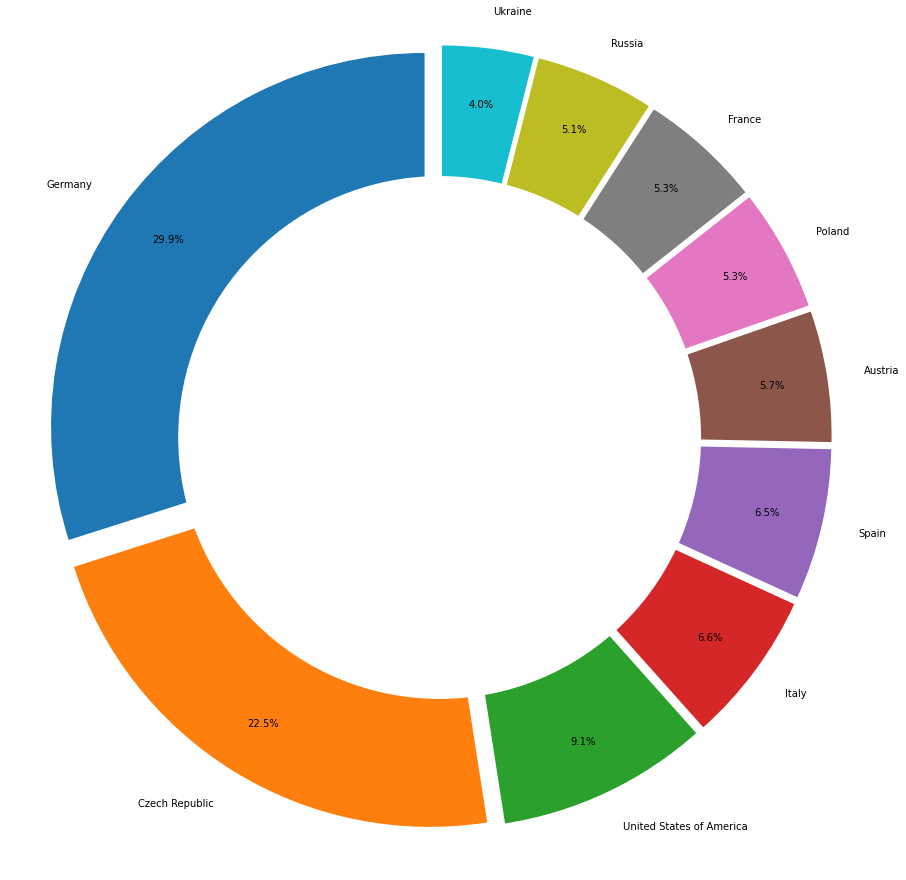

In [33]:
l = len(birthplacefem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in birthplacefem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now we repeat the same procedure with the man

In [34]:
#query for printing the results
menbirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(menbirthplace_query)
sparql_wd.setReturnFormat(JSON)
menbirthplacesResults = sparql_wd.query().convert()
#query for the csv
male_csv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT   ?countryLabel ?countryCode (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY   ?countryLabel ?countryCode
ORDER BY DESC(?totwomen)
"""

In [35]:
for result in menbirthplacesResults["results"]["bindings"]:
    birthplaces = result["placeofbirthLabel"]["value"]
    totaln = result["totmen"]["value"]
    country = result["countryLabel"]["value"]
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + "male art historian born in " + birthplaces + "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + "male art historians born in " + birthplaces + "  (" + country+ ")")

There are 217 male art historians born in Prague  (Czech Republic)
There are 192 male art historians born in Berlin  (Germany)
There are 162 male art historians born in Paris  (France)
There are 157 male art historians born in Vienna  (Austria)
There are 89 male art historians born in Budapest  (Hungary)
There are 87 male art historians born in Munich  (Germany)
There are 75 male art historians born in Rome  (Italy)
There are 75 male art historians born in London  (United Kingdom)
There are 71 male art historians born in Hamburg  (Germany)
There are 61 male art historians born in Dresden  (Germany)
There are 61 male art historians born in Moscow  (Russia)
There are 60 male art historians born in Saint Petersburg  (Russia)
There are 53 male art historians born in Leipzig  (Germany)
There are 53 male art historians born in Cologne  (Germany)
There are 50 male art historians born in Frankfurt am Main  (Germany)
There are 49 male art historians born in Brno  (Czech Republic)
There are 49 m

There is 1 male art historian born in Bad Bentheim  (Germany)
There is 1 male art historian born in Bischofsheim  (Germany)
There is 1 male art historian born in Q727146  (Germany)
There is 1 male art historian born in Jasło  (Poland)
There is 1 male art historian born in Kutuzovo  (Russia)
There is 1 male art historian born in Gräfentonna  (Germany)
There is 1 male art historian born in Katowice  (Poland)
There is 1 male art historian born in Comiso  (Italy)
There is 1 male art historian born in Reichenbach im Vogtland  (Germany)
There is 1 male art historian born in Pescasseroli  (Italy)
There is 1 male art historian born in Meilen  (Switzerland)
There is 1 male art historian born in Stäfa  (Switzerland)
There is 1 male art historian born in Casalecchio di Reno  (Italy)
There is 1 male art historian born in Čáslavice  (Czech Republic)
There is 1 male art historian born in Český Brod  (Czech Republic)
There is 1 male art historian born in Landsberg am Lech  (Germany)
There is 1 male a

There is 1 male art historian born in Kefalonia  (Greece)
There is 1 male art historian born in San Luis Potosí  (Mexico)
There is 1 male art historian born in London Borough of Bromley  (United Kingdom)
There is 1 male art historian born in Écully  (France)
There is 1 male art historian born in Tata  (Hungary)
There is 1 male art historian born in Jastrebarsko  (Croatia)
There is 1 male art historian born in Hard  (Austria)
There is 1 male art historian born in Bartoszyce  (Poland)
There is 1 male art historian born in Beaumarchés  (France)
There is 1 male art historian born in Burnham  (United Kingdom)
There is 1 male art historian born in Dacre  (United Kingdom)
There is 1 male art historian born in Q19638926  (Russia)
There is 1 male art historian born in Badajoz  (Spain)
There is 1 male art historian born in Hatfield  (United Kingdom)
There is 1 male art historian born in Lidingö  (Sweden)
There is 1 male art historian born in Workum  (Netherlands)
There is 1 male art historian bo

There is 1 male art historian born in Zagyvapálfalva  (Hungary)
There is 1 male art historian born in Potštát  (Czech Republic)
There is 1 male art historian born in Q3135158  (North Macedonia)
There is 1 male art historian born in Vorobiyivka  (Ukraine)
There is 1 male art historian born in Vorobiyivka  (Austria-Hungary)
There is 1 male art historian born in Vorobiyivka  (Austrian Empire)
There is 1 male art historian born in Brugge  (Belgium)
There is 1 male art historian born in Ivanovo  (Russia)
There is 1 male art historian born in Kemerovo  (Russia)
There is 1 male art historian born in Kirchheim unter Teck  (Germany)
There is 1 male art historian born in Tuttlingen  (Germany)
There is 1 male art historian born in Bad Hersfeld  (Germany)
There is 1 male art historian born in Łowicz  (Poland)
There is 1 male art historian born in Gorna Oryahovitsa  (Bulgaria)
There is 1 male art historian born in Łańcut  (Poland)
There is 1 male art historian born in Nejdek  (Czech Republic)
There

In [124]:
import pandas as pd
import csv
df = pd.read_csv("birthplaceman.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
citizenman_df = df[0:10]
print(citizenman_df)

                  countryLabel countryCode  totmen
0                      Germany          DE    2242
1               Czech Republic          CZ     785
2                       France          FR     623
3                        Italy          IT     531
4                       Poland          PL     369
5     United States of America          US     336
6                      Austria          AT     300
7               United Kingdom          GB     278
8                       Russia          RU     214
9                        Spain          ES     199
10                     Ukraine          UA     178
11                 Switzerland          CH     176
12                     Hungary          HU     172
13                 Netherlands          NL     160
14                     Belgium          BE     113
15                       Japan          JP     110
16                      Sweden          SE      92
17                     Romania          RO      75
18                    Slovenia 

In [37]:
birthplaceman_dict = {}
birthplaceman_list = df[0:10]
birthplaceman_dict = birthplaceman_list.set_index('countryCode').T.to_dict('list') 
print(birthplaceman_dict)

{'DE': ['Germany', 2242], 'CZ': ['Czech Republic', 785], 'FR': ['France', 623], 'IT': ['Italy', 531], 'PL': ['Poland', 369], 'US': ['United States of America', 336], 'AT': ['Austria', 300], 'GB': ['United Kingdom', 278], 'RU': ['Russia', 214], 'ES': ['Spain', 199]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-38-f2f614ae13e5>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


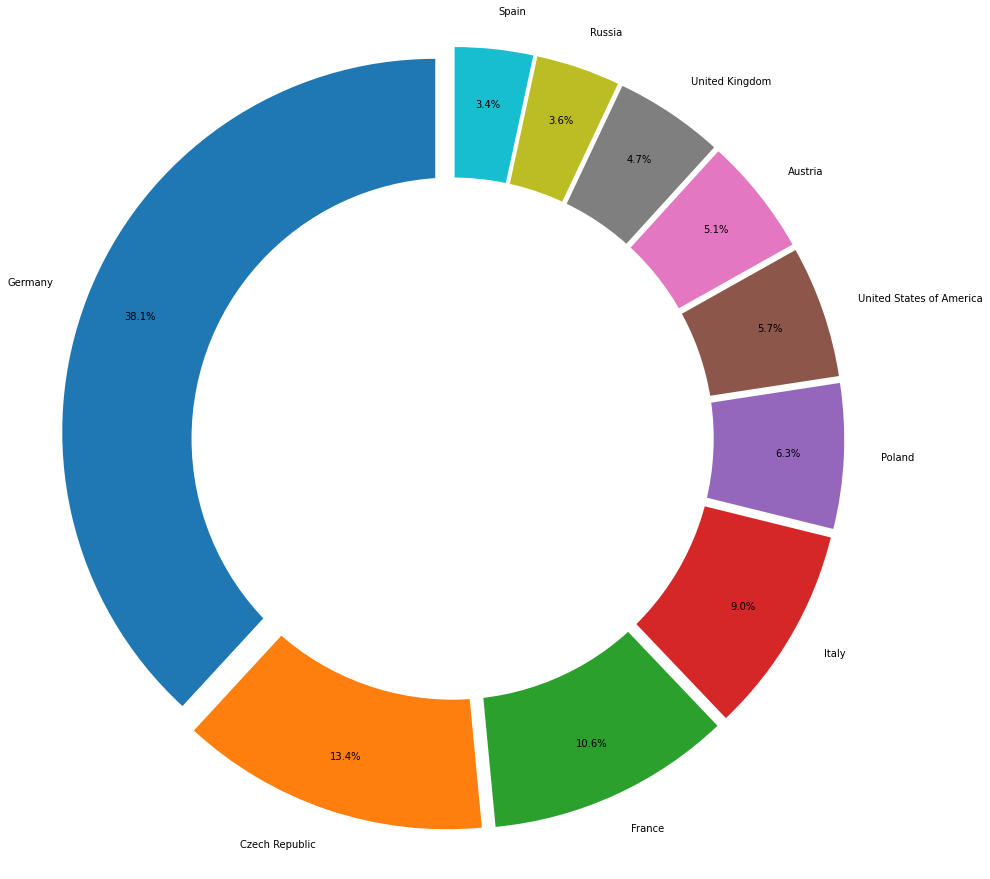

In [38]:
l = len(birthplaceman_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in birthplaceman_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [39]:
def sample_for_country(result, sex, subject):
    """
    * result: result of the query
    * sex: "man" or "woman" -> select the field "totman" or "totwoman"
    * subject: label of interest (example: placeofbirthLabel/educatedatLabel)
    """
    #if verbose: print(result) # <---------------- emergency debug
    country_info = {}
    for person in result:
        subject_field = person[subject]["value"]

        country = person["countryLabel"]["value"]
        n_birth = person[f"tot{sex}"]["value"]

        if country not in country_info:
            country_info[country] = []
        country_info[country].append((subject_field, n_birth))

    
    tot_pp_per_country = {}
    for country in country_info:
        total_birth_per_country = sum([int(n) for _,n in country_info[country]])
        tot_pp_per_country[country] = total_birth_per_country
        
    
    return tot_pp_per_country




def get_top_sample_by_women(all_countries, women_sample, men_sample, top=10):
    total = []
    for country in all_countries:

        tot_w = 0
        tot_m = 0 

        if country in women_sample: 
            tot_w = women_sample[country]

        if country in men_sample: 
            tot_m = men_sample[country]

        total.append((country, tot_w, tot_m))

    top_on_women = [(w,m,c) for c,w,m in total]
    top_on_women.sort(reverse=True)
    top_on_women = top_on_women[:top]
    top_on_women = {c:{"women":w, "men":m} for w,m,c in top_on_women}

    return top_on_women


def get_women_man_differences(womenResults, manResults, label):
    """
    Given a result of two sparql querys (for woman and for men), 
    retrieve the differences by sex according to a specific label
    """
    women_data = sample_for_country(womenResults, 
                                   sex="women", 
                                   subject=label)

    men_data = sample_for_country(manResults, 
                                 sex="men", 
                                 subject=label)

    countries_of_data = set(women_data.keys()).union(set(men_data.keys()))
    print("women:\t", len(women_data), "\nmen:\t", len(men_data), "\nunion:\t", len(countries_of_data))

    data_dict = get_top_sample_by_women(countries_of_data, women_data, men_data)
    df = pd.DataFrame.from_dict(data_dict, orient="index").plot.bar()
    return data_dict


def execute_query(query):
    sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
    sparql_wd.setQuery(query)
    sparql_wd.setReturnFormat(JSON)
    result = sparql_wd.query().convert()
    return result["results"]["bindings"]


Let's combine the results

In [40]:
fembirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""

menbirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totmen)
"""


womenbirthplacesResults = execute_query(fembirthplace_query)
menbirthplacesResults = execute_query(menbirthplace_query)

women:	 82 
men:	 139 
union:	 147


{'Germany': {'women': 561, 'men': 2242},
 'Czech Republic': {'women': 422, 'men': 785},
 'United States of America': {'women': 171, 'men': 336},
 'Italy': {'women': 123, 'men': 531},
 'Spain': {'women': 122, 'men': 200},
 'Austria': {'women': 106, 'men': 300},
 'France': {'women': 99, 'men': 624},
 'Poland': {'women': 99, 'men': 369},
 'Russia': {'women': 96, 'men': 215},
 'Ukraine': {'women': 74, 'men': 178}}

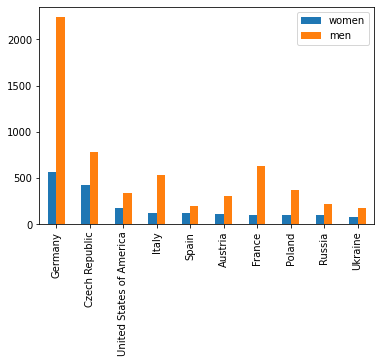

In [41]:
get_women_man_differences(womenResults = womenbirthplacesResults, 
                          manResults = menbirthplacesResults, 
                          label = "placeofbirthLabel")

## Citizenship

In [42]:
countryfem_query= """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(countryfem_query)
sparql_wd.setReturnFormat(JSON)
femcountryResults = sparql_wd.query().convert()


In [43]:
countryfem = {}
countryfemlist = []
for result in femcountryResults["results"]["bindings"]:
    country = result["citizenshipLabel"]["value"]
    totaln = result["totwomen"]["value"]
    countryfem[country] = totaln
    countryfemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian in " + country)
    else:
        print("There are "+ totaln + " " + " female art historians in " + country)

There are 474  female art historians in Germany
There are 361  female art historians in United States of America
There are 202  female art historians in France
There are 161  female art historians in Italy
There are 154  female art historians in Spain
There are 136  female art historians in Slovenia
There are 123  female art historians in Poland
There are 111  female art historians in United Kingdom
There are 103  female art historians in Austria
There are 81  female art historians in Russia
There are 74  female art historians in Kingdom of the Netherlands
There are 71  female art historians in Czech Republic
There are 60  female art historians in Switzerland
There are 58  female art historians in Hungary
There are 57  female art historians in Norway
There are 56  female art historians in Canada
There are 54  female art historians in Sweden
There are 52  female art historians in Denmark
There are 42  female art historians in Estonia
There are 29  female art historians in Finland
There 

Let's plot our results in a piechart using a pandas df

In [127]:
import pandas as pd
import csv
df = pd.read_csv("country_fem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
citizenfem_df = df[0:10]
print(citizenfem_df)

   countryCode                countryLabel  totwomen
0           DE                     Germany       473
1           US    United States of America       360
2           FR                      France       201
3           IT                       Italy       160
4           ES                       Spain       152
5           SI                    Slovenia       136
6           PL                      Poland       122
7           GB              United Kingdom       111
8           AT                     Austria       103
9           RU                      Russia        80
10          NL  Kingdom of the Netherlands        74
11          CZ              Czech Republic        71
12          CH                 Switzerland        60
13          HU                     Hungary        58
14          NO                      Norway        57
15          CA                      Canada        56
16          SE                      Sweden        54
17          DK                     Denmark    

In [45]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countryfem_dict = {}
countryfem_list = df[0:18]
countryfem_dict = countryfem_list.set_index('countryCode').T.to_dict('list') 
print(countryfem_dict)

{'DE': ['Germany', 473], 'US': ['United States of America', 360], 'FR': ['France', 201], 'IT': ['Italy', 160], 'ES': ['Spain', 152], 'SI': ['Slovenia', 136], 'PL': ['Poland', 122], 'GB': ['United Kingdom', 111], 'AT': ['Austria', 103], 'RU': ['Russia', 80], 'NL': ['Kingdom of the Netherlands', 74], 'CZ': ['Czech Republic', 71], 'CH': ['Switzerland', 60], 'HU': ['Hungary', 58], 'NO': ['Norway', 57], 'CA': ['Canada', 56], 'SE': ['Sweden', 54], 'DK': ['Denmark', 52]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-46-1c84d3045002>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


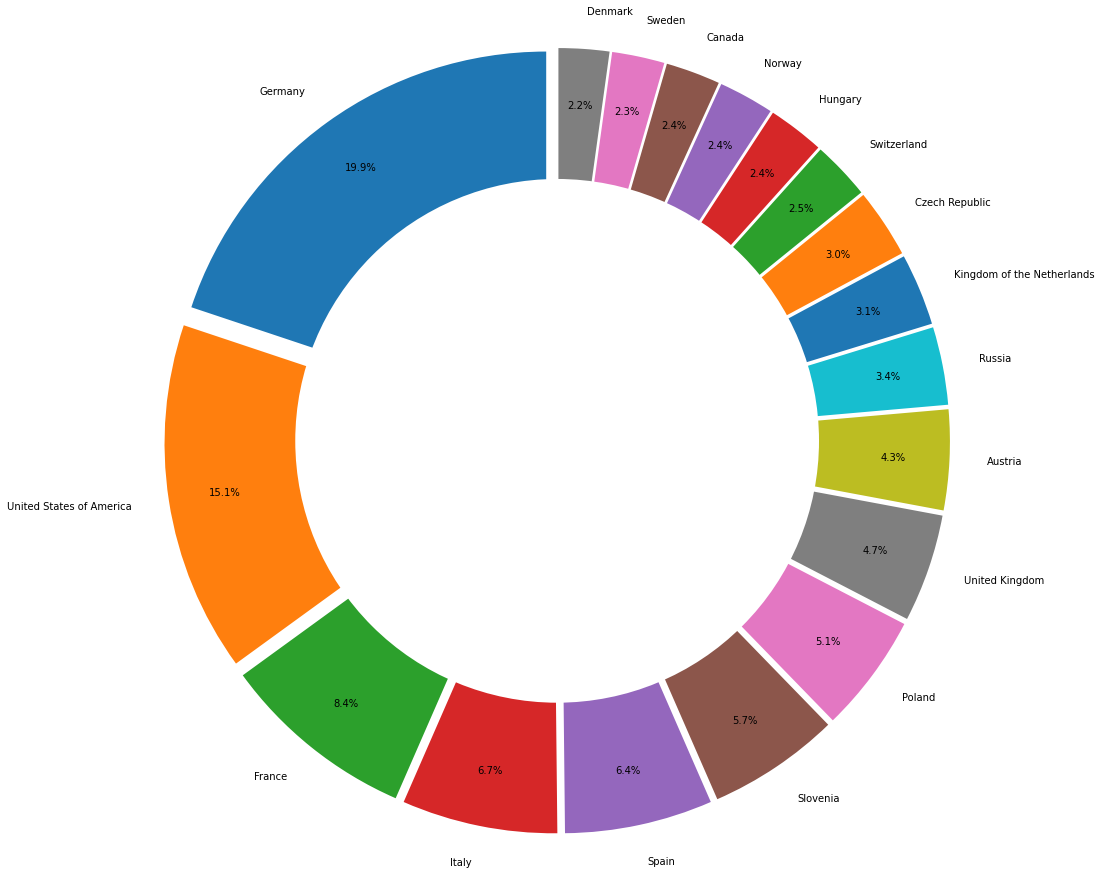

In [46]:
l = len(countryfem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countryfem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now let's check the number of male art historians to see if there are differences

In [47]:
countrymen_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(countrymen_query)
sparql_wd.setReturnFormat(JSON)
mencountryResults = sparql_wd.query().convert()

In [48]:
countrymen = {}
countrymenlist = []
countrymenlistviz = []
for result in mencountryResults["results"]["bindings"]:
    country = result["citizenshipLabel"]["value"]
    totaln = result["totmen"]["value"]
    countrymen[country] = totaln
    countrymenlist.append(int(totaln))
    
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian in " + country)
    else:
        print("There are "+ totaln + " " + " male art historians in " + country)

There are 1887  male art historians in Germany
There are 776  male art historians in France
There are 595  male art historians in United States of America
There are 391  male art historians in United Kingdom
There are 364  male art historians in Italy
There are 340  male art historians in Austria
There are 260  male art historians in Poland
There are 242  male art historians in Spain
There are 216  male art historians in Switzerland
There are 194  male art historians in Kingdom of the Netherlands
There are 167  male art historians in Japan
There are 161  male art historians in Hungary
There are 147  male art historians in Sweden
There are 127  male art historians in Czech Republic
There are 123  male art historians in Belgium
There are 109  male art historians in Denmark
There are 102  male art historians in Slovenia
There are 102  male art historians in Russia
There are 95  male art historians in Norway
There are 70  male art historians in Canada
There are 45  male art historians in G

Let's have a pie chart to have visual representations of the results using a pandas df

In [49]:
import pandas as pd
import csv
df = pd.read_csv("country_men.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode                countryLabel  totmen
0           DE                     Germany    1888
1           FR                      France     772
2           US    United States of America     595
3           GB              United Kingdom     390
4           IT                       Italy     364
5           AT                     Austria     340
6           PL                      Poland     260
7           ES                       Spain     241
8           CH                 Switzerland     216
9           NL  Kingdom of the Netherlands     194
10          JP                       Japan     167
11          HU                     Hungary     160
12          SE                      Sweden     147
13          CZ              Czech Republic     126
14          BE                     Belgium     123
15          DK                     Denmark     104
16          SI                    Slovenia     102
17          RU                      Russia     102
18          NO                 

In [50]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countrymale_dict = {}
countrymale_list = df[0:18]
countrymale_dict = countrymale_list.set_index('countryCode').T.to_dict('list') 
print(countrymale_dict)

{'DE': ['Germany', 1888], 'FR': ['France', 772], 'US': ['United States of America', 595], 'GB': ['United Kingdom', 390], 'IT': ['Italy', 364], 'AT': ['Austria', 340], 'PL': ['Poland', 260], 'ES': ['Spain', 241], 'CH': ['Switzerland', 216], 'NL': ['Kingdom of the Netherlands', 194], 'JP': ['Japan', 167], 'HU': ['Hungary', 160], 'SE': ['Sweden', 147], 'CZ': ['Czech Republic', 126], 'BE': ['Belgium', 123], 'DK': ['Denmark', 104], 'SI': ['Slovenia', 102], 'RU': ['Russia', 102]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-51-e3dcefd5d1a1>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


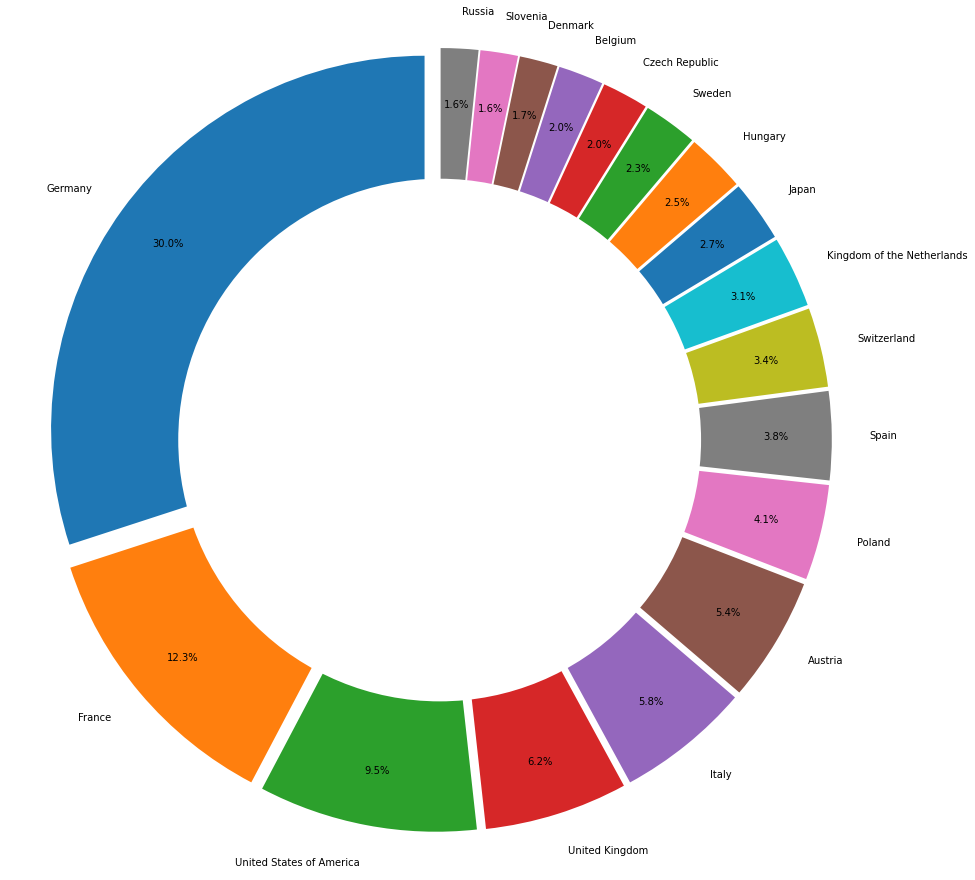

In [51]:
l = len(countrymale_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countrymale_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now let's combine the results to see the differences:

In [52]:
countryfem_query= """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totwomen)
"""



countrymen_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totmen)
"""


femcountryResults = execute_query(countryfem_query)
mencountryResults = execute_query(countrymen_query)

women:	 76 
men:	 68 
union:	 86


{'DE': {'women': 474, 'men': 1887},
 'US': {'women': 361, 'men': 595},
 'FR': {'women': 202, 'men': 776},
 'IT': {'women': 161, 'men': 364},
 'ES': {'women': 154, 'men': 242},
 'SI': {'women': 136, 'men': 102},
 'PL': {'women': 123, 'men': 260},
 'GB': {'women': 111, 'men': 391},
 'AT': {'women': 103, 'men': 340},
 'RU': {'women': 81, 'men': 102}}

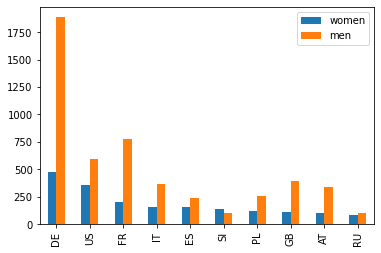

In [53]:
get_women_man_differences(womenResults = femcountryResults,
                          manResults = mencountryResults,
                          label = "citizenshipLabel")

## Place of education

In [78]:
educationfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
edfemcsv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
       ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(educationfem_query)
sparql_wd.setReturnFormat(JSON)
educationfemResults = sparql_wd.query().convert()

In [79]:
universityfem = {}
universityfemlist = []
for result in educationfemResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    university = result["educatedatLabel"]["value"]
    universityfem[country] = totaln
    universityfemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian that have studied in "  + university +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians that have studied in " + university +  "  (" + country+ ")")

There are 34  female art historians that have studied in University of Warsaw  (Poland)
There are 33  female art historians that have studied in Columbia University  (United States of America)
There are 32  female art historians that have studied in École du Louvre  (France)
There are 29  female art historians that have studied in University of Vienna  (Austria)
There are 27  female art historians that have studied in Harvard University  (United States of America)
There are 23  female art historians that have studied in University of Barcelona  (Spain)
There are 21  female art historians that have studied in Complutense University of Madrid  (Spain)
There are 19  female art historians that have studied in Jagiellonian University  (Poland)
There are 18  female art historians that have studied in Barnard College  (United States of America)
There are 17  female art historians that have studied in Eötvös Loránd University  (Hungary)
There are 15  female art historians that have studied in 

There is 1  female art historian that have studied in Queen's University  (United States of America)
There is 1  female art historian that have studied in Brown University  (Canada)
There is 1  female art historian that have studied in McMaster University  (Canada)
There is 1  female art historian that have studied in University of Vienna  (Switzerland)
There is 1  female art historian that have studied in Lund University  (Norway)
There is 1  female art historian that have studied in Paris 8 University  (Norway)
There is 1  female art historian that have studied in Jan Van Eyck Academie  (Norway)
There is 1  female art historian that have studied in Lund University  (Sweden)
There is 1  female art historian that have studied in Paris 8 University  (Sweden)
There is 1  female art historian that have studied in Jan Van Eyck Academie  (Sweden)
There is 1  female art historian that have studied in Moscow State Textile University  (Uzbekistan)
There is 1  female art historian that have stu

In [155]:
import pandas as pd
import csv
df = pd.read_csv("universityfem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
studyfem_df = df[:10]

print(studyfem_df)

  countryCode           countryLabel  totwomen
0          US  Stati Uniti d'America       487
1          FR                Francia       143
2          DE               Germania       125
3          ES                 Spagna       123
4          GB            Regno Unito       108
5          PL                Polonia        90
6          RU                 Russia        66
7          CA                 Canada        49
8          IT                 Italia        42
9          AT                Austria        40


In [156]:
#since the results are in italian let's use google translator library
import googletrans
from googletrans import Translator
# create a translator object
translator = Translator()

# use translate method to translate a string - by default, the destination language is english
translated = translator.translate('Ciao Mondo')

# the translate method returns an object
print(translated)
# Translated(src=es, dest=en, text=Hello World, pronunciation=Hello World, extra_data="{'translat...")



Translated(src=it, dest=en, text=Hello World, pronunciation=None, extra_data="{'confiden...")


In [157]:
# obtain translated string by using attribute .text
translated.text
# 'Hello World'
# make a deep copy of the data frame
studyfem_en = studyfem_df.copy()

# translate columns' name using rename function
studyfem_en.rename(columns=lambda x: translator.translate(x).text, inplace=True)

# translated column names
studyfem_en.columns

Index(['countryCode', 'countryLabel', 'totwomen'], dtype='object')

In [158]:
#modify all the terms of the data frame by using the previously created dictionary
studyfem_en.replace(translations, inplace = True)

# check translation
studyfem_en[:10]

,countryCode,countryLabel,totwomen
0,US,United States of America,487
1,FR,France,143
2,DE,Germany,125
3,ES,Spain,123
4,GB,UK,108
5,PL,Poland,90
6,RU,Russia,66
7,CA,Canada,49
8,IT,Italy,42
9,AT,Austria,40


In [159]:
unifem_dict = {}
unifem_list = studyfem_en[0:10]
unifem_dict = unifem_list.set_index('countryCode').T.to_dict('list') 
print(unifem_dict)

{'US': ['United States of America', 487], 'FR': ['France', 143], 'DE': ['Germany', 125], 'ES': ['Spain', 123], 'GB': ['UK', 108], 'PL': ['Poland', 90], 'RU': ['Russia', 66], 'CA': ['Canada', 49], 'IT': ['Italy', 42], 'AT': ['Austria', 40]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-89-6de40a9e7a78>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


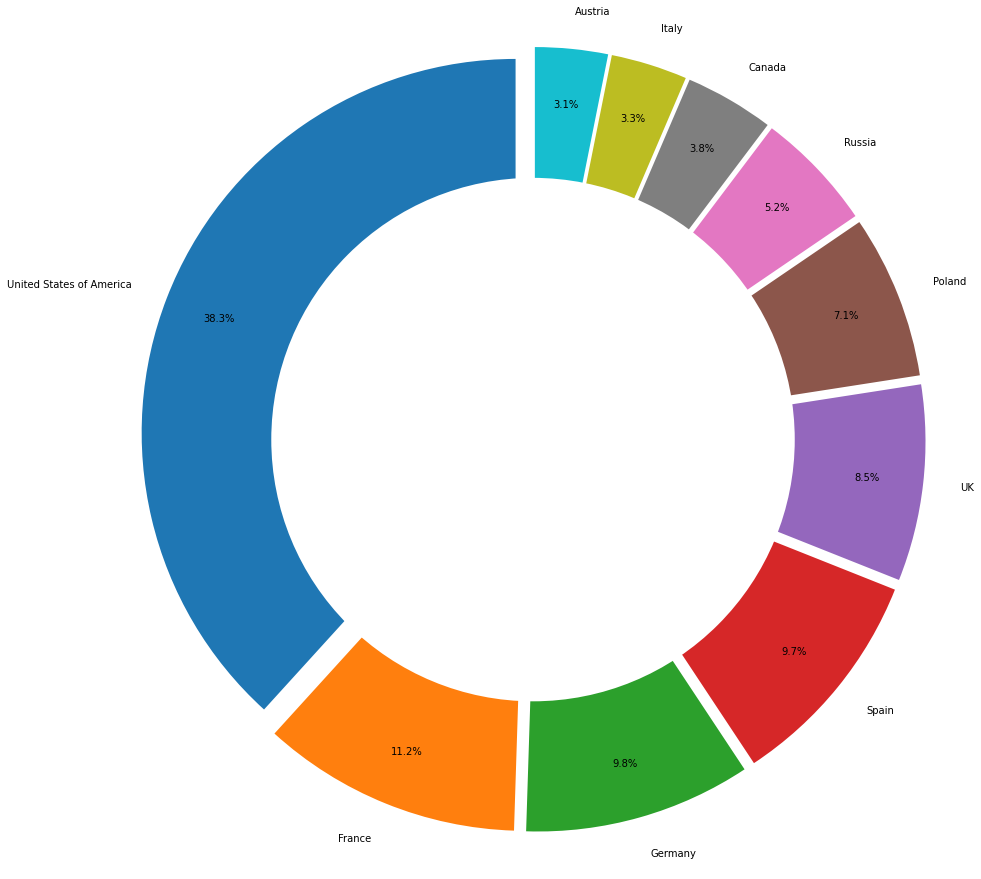

In [89]:
l = len(unifem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in unifem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's do the same with men

In [91]:
eduplaceman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
edumancsv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
       ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(eduplaceman_query)
sparql_wd.setReturnFormat(JSON)
educationmanResults = sparql_wd.query().convert()

In [93]:
universitymen = {}
universitymenlist = []
for result in educationmanResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    university = result["educatedatLabel"]["value"]
    universitymen[country] = totaln
    universitymenlist.append(int(totaln))
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian that have studied in "  + university +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " male art historians that have studied in " + university +  "  (" + country+ ")")

There are 92  male art historians that have studied in Harvard University  (United States of America)
There are 79  male art historians that have studied in University of Vienna  (Austria)
There are 57  male art historians that have studied in University of Tokyo  (Japan)
There are 54  male art historians that have studied in University of Bonn  (Germany)
There are 53  male art historians that have studied in École normale supérieure  (Paris)  (France)
There are 53  male art historians that have studied in École des Chartes  (France)
There are 49  male art historians that have studied in Faculty of Arts, Charles University in Prague  (Czechoslovakia)
There are 48  male art historians that have studied in École du Louvre  (France)
There are 44  male art historians that have studied in Jagiellonian University  (Poland)
There are 42  male art historians that have studied in Ludwig Maximilian University of Munich  (Germany)
There are 42  male art historians that have studied in Yale Univer

There is 1  male art historian that have studied in Scarsdale High School  (United States of America)
There is 1  male art historian that have studied in Sapienza University of Rome  (Spain)
There is 1  male art historian that have studied in University of Bucharest  (Spain)
There is 1  male art historian that have studied in Sapienza University of Rome  (Romania)
There is 1  male art historian that have studied in University of Paris 1 Pantheon-Sorbonne  (Romania)
There is 1  male art historian that have studied in Charles University  (Bulgaria)
There is 1  male art historian that have studied in Czech Technical University in Prague  (Bulgaria)
There is 1  male art historian that have studied in University of Vienna  (Russian Empire)
There is 1  male art historian that have studied in Annenschule  (Russian Empire)
There is 1  male art historian that have studied in Imperial University of Dorpat  (Russian Empire)
There is 1  male art historian that have studied in Leipzig University  (

There is 1  male art historian that have studied in Grekov Odessa Art school  (Russian Empire)
There is 1  male art historian that have studied in Grekov Odessa Art school  (Russian Socialist Federative Soviet Republic)
There is 1  male art historian that have studied in Lviv National Academy of Arts  (Ukraine)
There is 1  male art historian that have studied in Lviv National Academy of Arts  (Soviet Union)
There is 1  male art historian that have studied in Institute of Human Sciences  (Kingdom of the Netherlands)
There is 1  male art historian that have studied in Duitsland Instituut  (Kingdom of the Netherlands)
There is 1  male art historian that have studied in ETH Zürich  (Switzerland)
There is 1  male art historian that have studied in Yale School of Architecture  (United States of America)
There is 1  male art historian that have studied in Architectural Association School of Architecture  (United Kingdom)
There is 1  male art historian that have studied in Gál Ferenc Főiskola 

In [94]:
import pandas as pd
import csv
df = pd.read_csv("universitymen.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode           countryLabel  totmen
0           US  Stati Uniti d'America     684
1           DE               Germania     519
2           FR                Francia     446
3           GB            Regno Unito     440
4           PL                Polonia     196
5           JP               Giappone     165
6           ES                 Spagna     147
7           IT                 Italia     135
8           AT                Austria     119
9           RU                 Russia      95
10          NL  Regno dei Paesi Bassi      82
11          HU               Ungheria      70
12          CH               Svizzera      58
13          CA                 Canada      57
14          CZ        Repubblica Ceca      50
15          GR                 Grecia      49
16          BE                 Belgio      43
17          NO               Norvegia      34
18          SE                 Svezia      33
19          DK              Danimarca      33
20          RO                Roma

In [95]:
#since the results are in italian let's use google translator library
import googletrans
from googletrans import Translator
# create a translator object
translator = Translator()

# use translate method to translate a string - by default, the destination language is english
translated = translator.translate('Ciao Mondo')

# the translate method returns an object
print(translated)
# Translated(src=es, dest=en, text=Hello World, pronunciation=Hello World, extra_data="{'translat...")



Translated(src=it, dest=en, text=Hello World, pronunciation=None, extra_data="{'confiden...")


In [96]:
# obtain translated string by using attribute .text
translated.text
# 'Hello World'
# make a deep copy of the data frame
df_en = df.copy()

# translate columns' name using rename function
df_en.rename(columns=lambda x: translator.translate(x).text, inplace=True)

# translated column names
df_en.columns

Index(['countryCode', 'countryLabel', 'totmen'], dtype='object')

In [97]:
#modify all the terms of the data frame by using the previously created dictionary
df_en.replace(translations, inplace = True)

# check translation
df_en

,countryCode,countryLabel,totmen
0,US,United States of America,684
1,DE,Germany,519
2,FR,France,446
3,GB,UK,440
4,PL,Poland,196
5,JP,Giappone,165
6,ES,Spain,147
7,IT,Italy,135
8,AT,Austria,119
9,RU,Russia,95


In [98]:
unimen_dict = {}
unimen_list = df_en[0:10]
unimen_dict = unifem_list.set_index('countryCode').T.to_dict('list') 
print(unimen_dict)

{'US': ['United States of America', 487], 'FR': ['France', 143], 'DE': ['Germany', 125], 'ES': ['Spain', 123], 'GB': ['UK', 108], 'PL': ['Poland', 90], 'RU': ['Russia', 66], 'CA': ['Canada', 49], 'IT': ['Italy', 42], 'AT': ['Austria', 40]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-99-8eb0492263bc>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


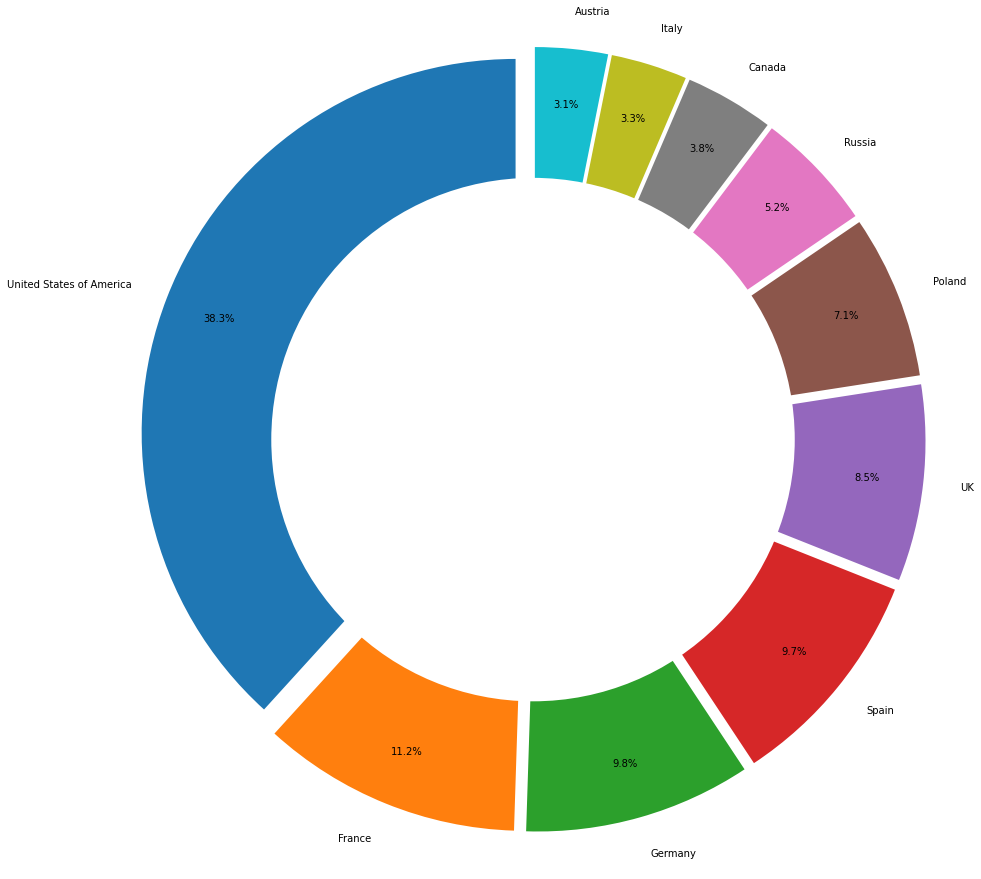

In [99]:
l = len(unimen_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in unimen_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's combine the results

In [102]:
educationfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""


eduplaceman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totmen)
"""


educationfemResults = execute_query(educationfem_query)
educationmanResults = execute_query(eduplaceman_query)

women:	 87 
men:	 129 
union:	 149


{'United States of America': {'women': 487, 'men': 684},
 'France': {'women': 143, 'men': 446},
 'Germany': {'women': 125, 'men': 519},
 'Spain': {'women': 123, 'men': 147},
 'United Kingdom': {'women': 108, 'men': 440},
 'Soviet Union': {'women': 105, 'men': 216},
 'Poland': {'women': 90, 'men': 196},
 'Russia': {'women': 66, 'men': 95},
 'Canada': {'women': 49, 'men': 57},
 'Italy': {'women': 42, 'men': 135}}

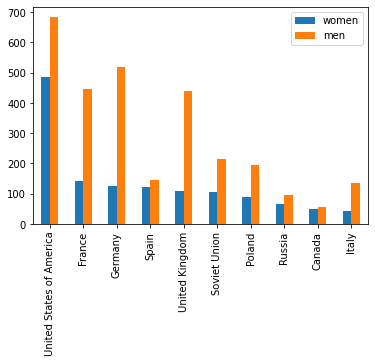

In [103]:
get_women_man_differences(womenResults = educationfemResults,
                          manResults = educationmanResults,
                          label = "educatedatLabel")

## Workplace

In [66]:
feminstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(feminstitute_query)
sparql_wd.setReturnFormat(JSON)
feminstituteResults = sparql_wd.query().convert()

feminstitutecsv_query = """

PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?countryCode  ?countryLabel
ORDER BY DESC (?totwomen)

"""

In [67]:
institutefem = {}
intitutefemlist = []
for result in feminstituteResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    institute = result["institutionLabel"]["value"]
    institutefem[country] = totaln
    intitutefemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian that works in "  + institute +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians that work in " + institute +  "  (" + country+ ")")

There are 48  female art historians that work in German Archaeological Institute  (Germany)
There are 18  female art historians that work in American Academy of Arts and Sciences  (United States of America)
There are 13  female art historians that work in Academia Europaea  (United Kingdom)
There are 12  female art historians that work in Royal Swedish Academy of Letters, History and Antiquities  (Sweden)
There are 10  female art historians that work in Medieval Academy of America  (United States of America)
There are 8  female art historians that work in British Academy  (United Kingdom)
There are 7  female art historians that work in Real Academia de Bellas Artes de San Fernando  (Spain)
There are 6  female art historians that work in Mommsen Society  (Germany)
There are 6  female art historians that work in Reial Acadèmia Catalana de Belles Arts de Sant Jordi  (Spain)
There are 6  female art historians that work in College Art Association  (United States of America)
There are 6  fem

In [238]:
import pandas as pd
import csv
df = pd.read_csv("institutefem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
wf_df = df[0:10]
print(wf_df)

             countryLabel countryCode  totwomen
0                Germania          DE        96
1   Stati Uniti d'America          US        80
2                  Spagna          ES        40
3             Regno Unito          GB        32
4                 Francia          FR        31
5                  Italia          IT        22
6                  Svezia          SE        16
7                 Austria          AT        11
8                  Belgio          BE         8
9                 Polonia          PL         8
10                Ucraina          UA         8
11            Paesi Bassi          NL         7
12               Norvegia          NO         7
13                Armenia          AM         6
14            Bielorussia          BY         6
15                Messico          MX         5
16                Estonia          EE         4
17               Bulgaria          BG         3
18              Danimarca          DK         3
19                 Grecia          GR   

In [239]:
#since the results are in italian let's use google translator library
import googletrans
from googletrans import Translator
# create a translator object
translator = Translator()

# use translate method to translate a string - by default, the destination language is english
translated = translator.translate('Ciao Mondo')

# the translate method returns an object
print(translated)
# Translated(src=es, dest=en, text=Hello World, pronunciation=Hello World, extra_data="{'translat...")



Translated(src=it, dest=en, text=Hello World, pronunciation=None, extra_data="{'confiden...")


In [240]:
# obtain translated string by using attribute .text
translated.text
# 'Hello World'
# make a deep copy of the data frame
workfem_df = wf_df.copy()

# translate columns' name using rename function
workfem_df.rename(columns=lambda x: translator.translate(x).text, inplace=True)

# translated column names
workfem_df.columns

Index(['countryLabel', 'countryCode', 'totwomen'], dtype='object')

In [241]:
 #modify all the terms of the data frame by using the previously created dictionary
workfem_df.replace(translations, inplace = True)

# check translation
workfem_df

,countryLabel,countryCode,totwomen
0,Germany,DE,96
1,United States of America,US,80
2,Spain,ES,40
3,UK,GB,32
4,France,FR,31
5,Italy,IT,22
6,Sweden,SE,16
7,Austria,AT,11
8,Belgium,BE,8
9,Poland,PL,8


In [243]:
#for readability reason of the visualization are taken into consideration the first 9 countries, to see graphically what are the 
edufem_dict = {}
edufem_list = workfem_en[0:10]
edufem_dict = edufem_list.set_index('countryCode').T.to_dict('list') 
print(edufem_dict)

{'DE': ['Germany', 96], 'US': ['United States of America', 80], 'ES': ['Spain', 40], 'GB': ['UK', 32], 'FR': ['France', 31], 'IT': ['Italy', 22], 'SE': ['Sweden', 16], 'AT': ['Austria', 11], 'BE': ['Belgium', 8], 'PL': ['Poland', 8]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-244-f1ecf7f18cf5>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


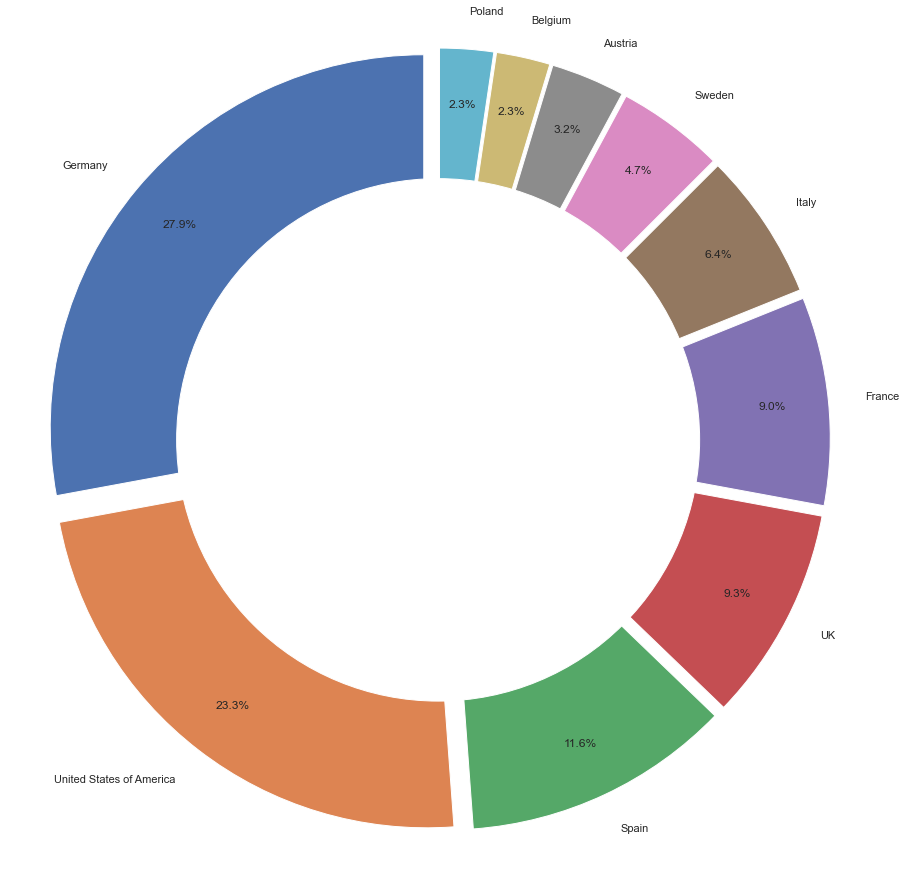

In [244]:
l = len(edufem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in edufem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's do the same with the men

In [63]:
maleinstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totmen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(maleinstitute_query)
sparql_wd.setReturnFormat(JSON)
maleinstituteResults = sparql_wd.query().convert()

maleinstitutecsv_query = """

"""

In [65]:
institutemen = {}
intitutemenlist = []
for result in maleinstituteResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    institute = result["institutionLabel"]["value"]
    institutemen[country] = totaln
    intitutemenlist.append(int(totaln))
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian that works in "  + institute +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " male art historians that work in " + institute +  "  (" + country+ ")")

There are 428  male art historians that work in German Archaeological Institute  (Germany)
There are 136  male art historians that work in American Academy of Arts and Sciences  (United States of America)
There are 94  male art historians that work in Académie des Inscriptions et Belles-Lettres  (France)
There are 88  male art historians that work in Royal Swedish Academy of Letters, History and Antiquities  (Sweden)
There are 84  male art historians that work in Bavarian Academy of Sciences and Humanities  (Germany)
There are 66  male art historians that work in Austrian Archaeological Institute  (Austria)
There are 56  male art historians that work in Royal Prussian Academy of Sciences  (Germany)
There are 54  male art historians that work in Lincean Academy  (Italy)
There are 53  male art historians that work in Real Academia de Bellas Artes de San Fernando  (Spain)
There are 51  male art historians that work in British Academy  (United Kingdom)
There are 48  male art historians tha

In [68]:
import pandas as pd
import csv
df = pd.read_csv("instituteman.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode           countryLabel  totmen
0           DE               Germania     911
1           FR                Francia     331
2           US  Stati Uniti d'America     242
3           GB            Regno Unito     206
4           ES                 Spagna     183
5           IT                 Italia     173
6           SE                 Svezia     132
7           AT                Austria     122
8           PL                Polonia      78
9           NL            Paesi Bassi      56
10          BE                 Belgio      49
11          HU               Ungheria      33
12          RU                 Russia      30
13          RS                 Serbia      30
14          NO               Norvegia      20
15          UA                Ucraina      19
16          GR                 Grecia      17
17          DK              Danimarca      14
18          CZ        Repubblica Ceca      13
19          AM                Armenia      13
20          BY            Bielorus

In [69]:
#since the results are in italian let's use google translator library
import googletrans
from googletrans import Translator
# create a translator object
translator = Translator()

# use translate method to translate a string - by default, the destination language is english
translated = translator.translate('Ciao Mondo')

# the translate method returns an object
print(translated)
# Translated(src=es, dest=en, text=Hello World, pronunciation=Hello World, extra_data="{'translat...")



Translated(src=it, dest=en, text=Hello World, pronunciation=None, extra_data="{'confiden...")


In [70]:
# obtain translated string by using attribute .text
translated.text
# 'Hello World'
# make a deep copy of the data frame
df_en = df.copy()

# translate columns' name using rename function
df_en.rename(columns=lambda x: translator.translate(x).text, inplace=True)

# translated column names
df_en.columns

Index(['countryCode', 'countryLabel', 'totmen'], dtype='object')

In [71]:
#modify all the terms of the data frame by using the previously created dictionary
df_en.replace(translations, inplace = True)

# check translation
df_en

,countryCode,countryLabel,totmen
0,DE,Germany,911
1,FR,France,331
2,US,United States of America,242
3,GB,UK,206
4,ES,Spain,183
5,IT,Italy,173
6,SE,Sweden,132
7,AT,Austria,122
8,PL,Poland,78
9,NL,Netherlands,56


In [72]:
#for readability reason of the visualization are taken into consideration the first 9 countries, to see graphically what are the 
edumen_dict = {}
edumen_list = df_en[0:10]
edumen_dict = edufem_list.set_index('countryCode').T.to_dict('list') 
print(edumen_dict)

{'DE': ['Germany', 96], 'US': ['United States of America', 80], 'ES': ['Spain', 40], 'GB': ['UK', 32], 'FR': ['France', 31], 'IT': ['Italy', 22], 'SE': ['Sweden', 16], 'AT': ['Austria', 11], 'BE': ['Belgium', 8], 'PL': ['Poland', 8]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-73-0c374f460dd2>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


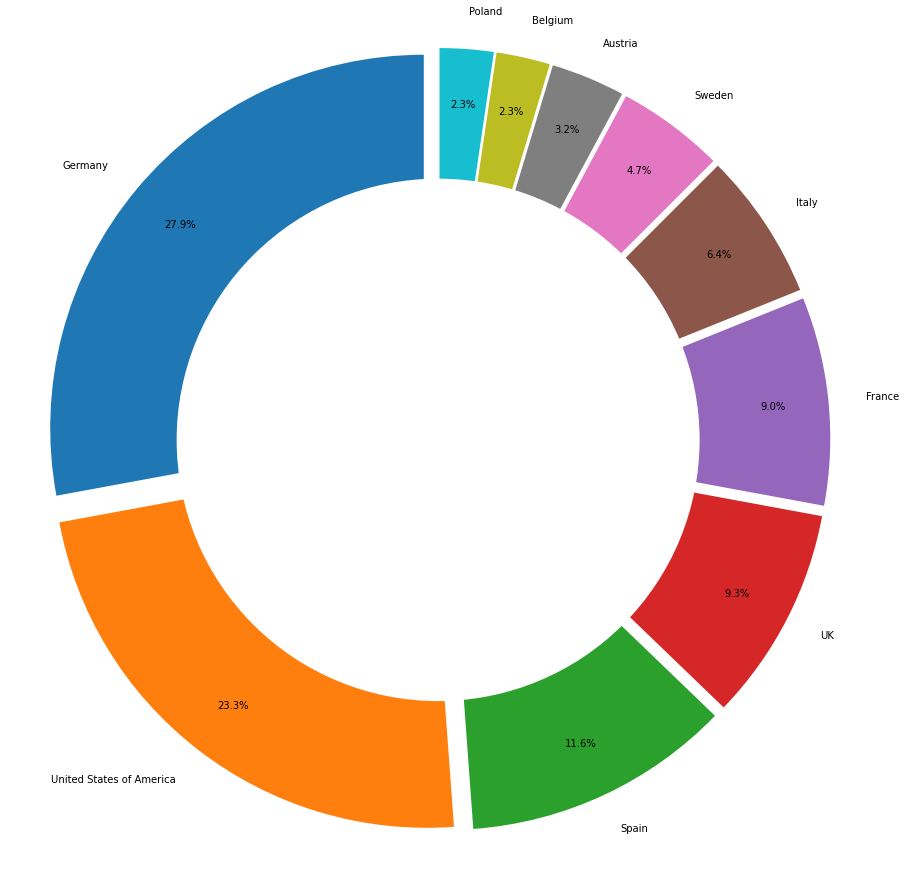

In [73]:
l = len(edumen_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in edumen_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's combine the results 

In [74]:
feminstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totwomen)
"""


maleinstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totmen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totmen)
"""

feminstituteResults = execute_query(feminstitute_query)
maleinstituteResults = execute_query(maleinstitute_query)

women:	 33 
men:	 46 
union:	 47


{'Germany': {'women': 96, 'men': 911},
 'United States of America': {'women': 80, 'men': 242},
 'Spain': {'women': 40, 'men': 183},
 'United Kingdom': {'women': 32, 'men': 206},
 'France': {'women': 31, 'men': 331},
 'Italy': {'women': 22, 'men': 173},
 'Sweden': {'women': 16, 'men': 132},
 'Austria': {'women': 11, 'men': 122},
 'Poland': {'women': 8, 'men': 78},
 'Belgium': {'women': 8, 'men': 49}}

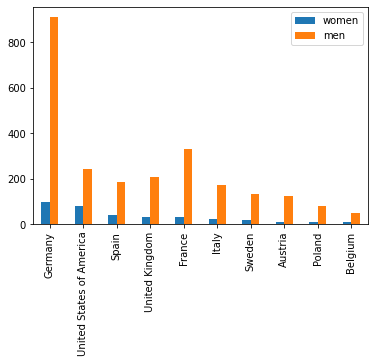

In [75]:
get_women_man_differences(womenResults = feminstituteResults,
                          manResults = maleinstituteResults,
                          label = "institutionLabel")

## Occupation

In [104]:
femoccupation_query ="""
SELECT DISTINCT ?occupationLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581072;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(femoccupation_query)
sparql_wd.setReturnFormat(JSON)
femoccupationResults = sparql_wd.query().convert()

In [105]:
import pandas as pd
import csv
df = pd.read_csv("occupation.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


                       occupationLabel  totwoman
0                        art historian      4818
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                  

In [106]:
datawoman = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datawoman)

                       occupationLabel  totwoman
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                           architect        55
20                  

In [107]:
#among the results we decide to take the first most significan 10, in order to graph to them 
#DataFrame as a Dictionary, access its columns using the indexing [] notation
#iloc is a pandas method for specific operators for rows/columns selection, odataframe.iloc[where_i,where_j]
#index-based selection, i.e. select rows and columns by integer position
#where_i is the row number (: otherwise), where_j is the column number (can be omitted).
occupationwomen = df.iloc[1:11] 
print(occupationwomen)

            occupationLabel  totwoman
1        university teacher       405
2                 historian       404
3        exhibition curator       383
4                   curator       340
5                    writer       337
6             archaeologist       181
7   architectural historian       159
8                art critic       149
9                journalist       131
10               translator       109


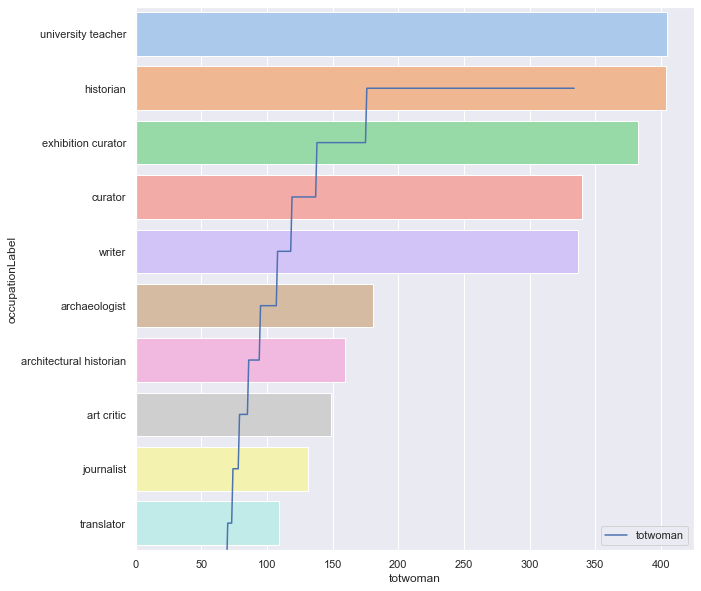

In [108]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totwoman", palette="pastel", data= occupationwomen)

In [109]:
menoccupation_query = """
SELECT DISTINCT ?occupationLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581097;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(menoccupation_query)
sparql_wd.setReturnFormat(JSON)
menoccupationResults = sparql_wd.query().convert()

In [110]:
import pandas as pd
import csv
df = pd.read_csv("occupationmale_query.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

                                       occupationLabel  totmen
0                                        art historian   10258
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director 

In [111]:
datamen = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datamen)

                                       occupationLabel  totmen
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director     261
15                                                poet 

In [112]:
occupationmen = df.iloc[1:11] 
print(occupationmen)

            occupationLabel  totmen
1        university teacher    1785
2             archaeologist    1091
3                 historian    1013
4                    writer     999
5   architectural historian     765
6                   painter     603
7                 architect     556
8                   curator     510
9                art critic     461
10       exhibition curator     422


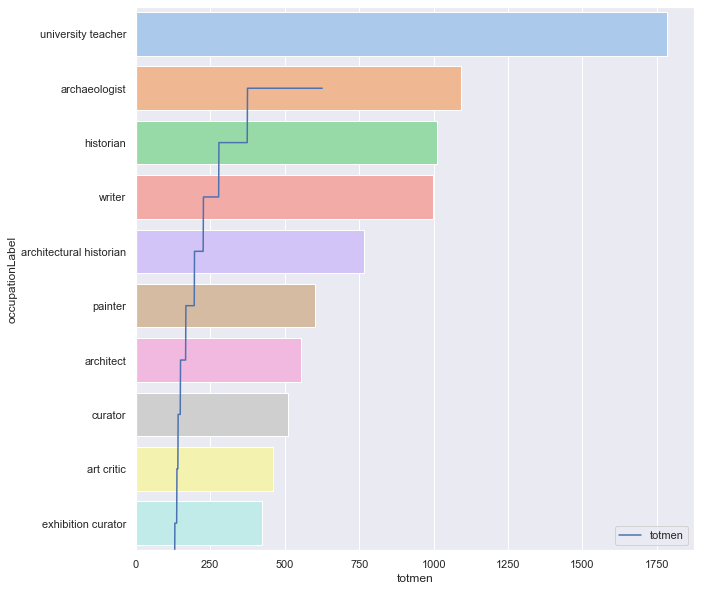

In [113]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totmen", palette="pastel", data= occupationmen)

## Place of death

In [188]:
placeofdeathfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofdeath ?placeofdeathLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P20 ?placeofdeath;
            wdt:P27 ?country.
      ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofdeath ?placeofdeathLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
csv
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(placeofdeathfem_query)
sparql_wd.setReturnFormat(JSON)
deathfemResults = sparql_wd.query().convert()

In [189]:
deathfem = {}
deathfemlist = []
for result in deathfemResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    deathplace = result["placeofdeathLabel"]["value"]
    deathfem[country] = totaln
    deathfemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian  have died in "  + deathplace +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians  have died in " + deathplace +  "  (" + country+ ")")

In [264]:
import pandas as pd
import csv
df = pd.read_csv("deathfem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
deathfem_df = df[0:10]
print(deathfem_df)

                  countryLabel countryCode  totwomen
0                      Germany          DE        91
1     United States of America          US        83
2                       France          FR        45
3                        Italy          IT        37
4                      Austria          AT        36
5                       Poland          PL        33
6               United Kingdom          GB        26
7                      Hungary          HU        22
8   Kingdom of the Netherlands          NL        21
9                       Russia          RU        18
10                      Sweden          SE        14
11              Czech Republic          CZ        12
12                 Switzerland          CH        12
13                       Spain          ES        12
14                      Norway          NO         6
15                      Mexico          MX         5
16                     Romania          RO         5
17                     Ukraine          UA    

In [193]:
deathfem_dict = {}
deathfem_list = df[0:18]
deathfem_dict = deathfem_list.set_index('countryCode').T.to_dict('list') 
print(deathfem_dict)

{'DE': ['Germany', 91], 'US': ['United States of America', 83], 'FR': ['France', 45], 'IT': ['Italy', 37], 'AT': ['Austria', 36], 'PL': ['Poland', 33], 'GB': ['United Kingdom', 26], 'HU': ['Hungary', 22], 'NL': ['Kingdom of the Netherlands', 21], 'RU': ['Russia', 18], 'SE': ['Sweden', 14], 'CZ': ['Czech Republic', 12], 'CH': ['Switzerland', 12], 'ES': ['Spain', 12], 'NO': ['Norway', 6], 'MX': ['Mexico', 5], 'RO': ['Romania', 5], 'UA': ['Ukraine', 5]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-194-5fba84f9fd4a>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


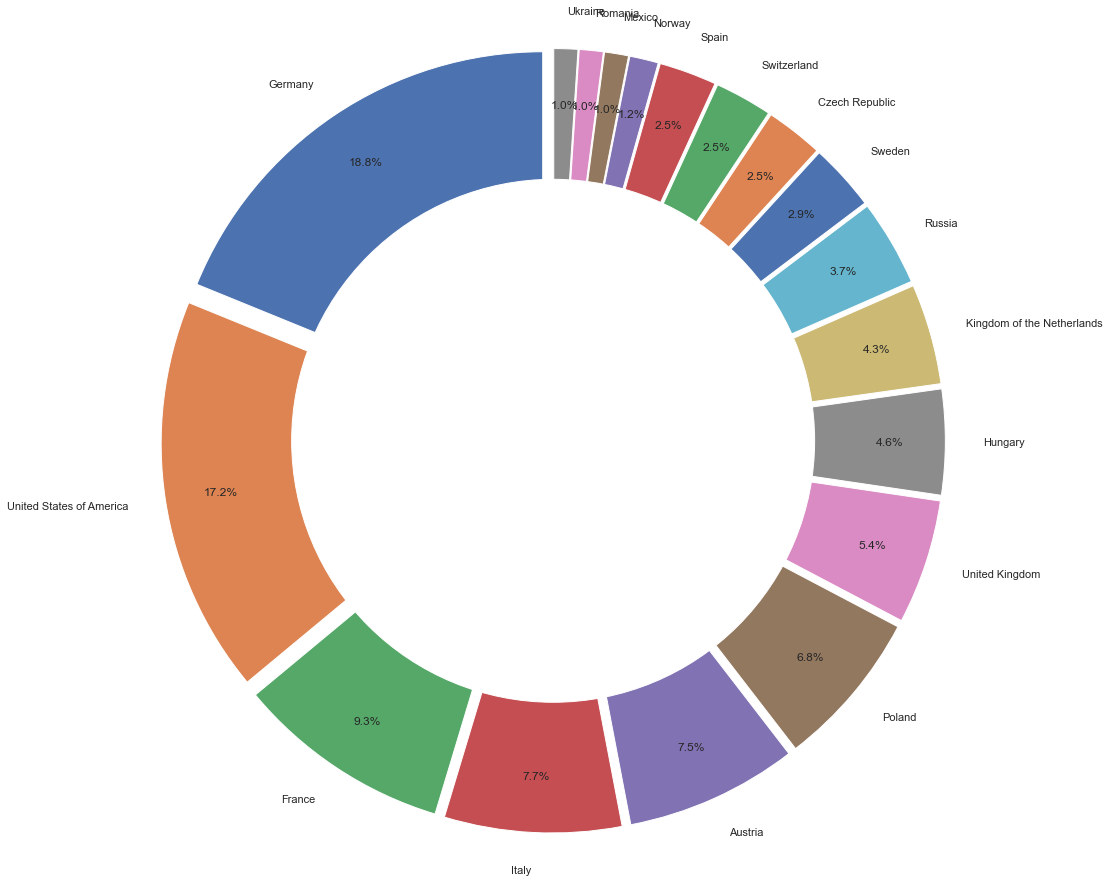

In [194]:
l = len(deathfem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in deathfem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [195]:
placeofdeathman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofdeath ?placeofdeathLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P20 ?placeofdeath;
            wdt:P27 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofdeath ?placeofdeathLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(placeofdeathman_query)
sparql_wd.setReturnFormat(JSON)
deathmanResults = sparql_wd.query().convert()

In [196]:
deathman = {}
deathmanlist = []
for result in deathmanResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    deathplace = result["placeofdeathLabel"]["value"]
    deathman[country] = totaln
    deathmanlist.append(int(totaln))
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian  have died in "  + deathplace +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " male art historians have died in " + deathplace +  "  (" + country+ ")")

There are 207  male art historians have died in Paris  (France)
There are 117  male art historians have died in Berlin  (Germany)
There are 110  male art historians have died in Prague  (Czechoslovakia)
There are 77  male art historians have died in Vienna  (Austria)
There are 72  male art historians have died in Budapest  (Hungary)
There are 72  male art historians have died in Munich  (Germany)
There are 67  male art historians have died in Rome  (Kingdom of Italy)
There are 58  male art historians have died in Rome  (Italy)
There are 49  male art historians have died in Moscow  (Soviet Union)
There are 46  male art historians have died in New York City  (United States of America)
There are 46  male art historians have died in London  (United Kingdom)
There are 40  male art historians have died in Warsaw  (Poland)
There are 28  male art historians have died in Amsterdam  (Kingdom of the Netherlands)
There are 28  male art historians have died in Madrid  (Spain)
There are 26  male art

There is 1  male art historian  have died in Kyoto  (Japan)
There is 1  male art historian  have died in Oxford  (France)
There is 1  male art historian  have died in Hythe  (United Kingdom)
There is 1  male art historian  have died in Needham  (Sri Lanka)
There is 1  male art historian  have died in Velyki Ozera  (Poland)
There is 1  male art historian  have died in Germering  (Germany)
There is 1  male art historian  have died in Rome  (Great Britain)
There is 1  male art historian  have died in Weingarten  (Germany)
There is 1  male art historian  have died in Krynica Morska  (German Reich)
There is 1  male art historian  have died in Essen  (Germany)
There is 1  male art historian  have died in Darwin  (Australia)
There is 1  male art historian  have died in Greece  (United States of America)
There is 1  male art historian  have died in Greece  (Greece)
There is 1  male art historian  have died in St Leonards-on-Sea  (United Kingdom)
There is 1  male art historian  have died in St 

There is 1  male art historian  have died in Hampshire  (United States of America)
There is 1  male art historian  have died in Belgrade  (Principality of Serbia)
There is 1  male art historian  have died in Hyères  (France)
There is 1  male art historian  have died in Château de Bachac  (France)
There is 1  male art historian  have died in Lebanon  (United States of America)
There is 1  male art historian  have died in Namur  (Belgium)
There is 1  male art historian  have died in Rigaud  (Canada)
There is 1  male art historian  have died in Prague  (Germany)
There is 1  male art historian  have died in Ljubljana  (Yugoslavia)
There is 1  male art historian  have died in Ljubljana  (Kingdom of Italy)
There is 1  male art historian  have died in Novo mesto  (Austria-Hungary)
There is 1  male art historian  have died in Novo mesto  (Kingdom of Yugoslavia)
There is 1  male art historian  have died in Novo mesto  (Kingdom of Serbs, Croats and Slovenes)
There is 1  male art historian  have 

In [197]:
import pandas as pd
import csv
df = pd.read_csv("deathmen.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:10])

                                     countryLabel  totmen
0                                         Germany     970
1                                          France     454
2                        United States of America     231
3                                Kingdom of Italy     222
4                                  Czechoslovakia     202
5                                         Austria     185
6                                           Italy     170
7                                    Soviet Union     147
8                                  United Kingdom     143
9                                  Russian Empire     120
10                                         Poland     118
11                                        Hungary     104
12                     Kingdom of the Netherlands     101
13                                   German Reich      98
14    United Kingdom of Great Britain and Ireland      93
15                                          Spain      92
16            

In [198]:
deathmen_dict = {}
deathmen_list = df[0:10]
deathmen_dict = deathfem_list.set_index('countryCode').T.to_dict('list') 
print(deathmen_dict)

{'DE': ['Germany', 91], 'US': ['United States of America', 83], 'FR': ['France', 45], 'IT': ['Italy', 37], 'AT': ['Austria', 36], 'PL': ['Poland', 33], 'GB': ['United Kingdom', 26], 'HU': ['Hungary', 22], 'NL': ['Kingdom of the Netherlands', 21], 'RU': ['Russia', 18], 'SE': ['Sweden', 14], 'CZ': ['Czech Republic', 12], 'CH': ['Switzerland', 12], 'ES': ['Spain', 12], 'NO': ['Norway', 6], 'MX': ['Mexico', 5], 'RO': ['Romania', 5], 'UA': ['Ukraine', 5]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-199-ed22416b8196>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


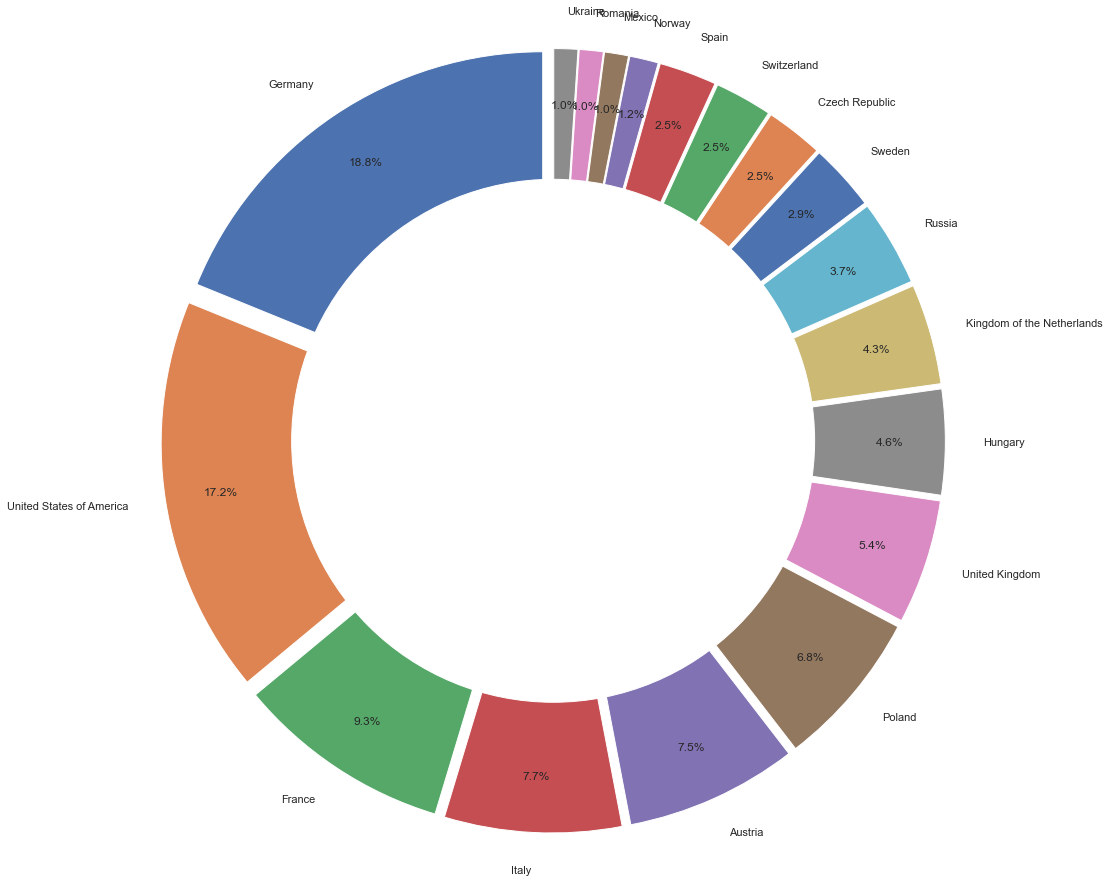

In [199]:
l = len(deathmen_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in deathmen_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's combine our results

In [200]:
placeofdeathfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofdeath ?placeofdeathLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P20 ?placeofdeath;
            wdt:P27 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofdeath ?placeofdeathLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""

placeofdeathman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofdeath ?placeofdeathLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P20 ?placeofdeath;
            wdt:P27 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofdeath ?placeofdeathLabel ?countryLabel
ORDER BY DESC(?totmen)
"""

deathfemResults = execute_query(placeofdeathfem_query)
deathmanResults = execute_query(placeofdeathman_query)

In [187]:
get_women_man_differences(womenResults = deathfemResults,
                          manResults = deathmanResults,
                          label = "placeofdeathLabel")

TypeError: string indices must be integers

In [184]:
citizenfem_df 


,countryCode,countryLabel,totwomen
0,DE,Germany,473
1,US,United States of America,360
2,FR,France,201
3,IT,Italy,160
4,ES,Spain,152
5,SI,Slovenia,136
6,PL,Poland,122
7,GB,United Kingdom,111
8,AT,Austria,103
9,RU,Russia,80


In [134]:
birthfem_df

,countryLabel,countryCode,totwomen
0,Germany,DE,560
1,Czech Republic,CZ,422
2,United States of America,US,171
3,Italy,IT,123
4,Spain,ES,122
5,Austria,AT,106
6,Poland,PL,99
7,France,FR,99
8,Russia,RU,96
9,Ukraine,UA,74


### Where did came from the female art historians that are born and have citizenship of the same country?

In [259]:
citizenfem_df 
# Reset the index values to the second dataframe appends properly
citizenfem_df = citizenfem_df.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

In [260]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([citizenfem_df, birthfem_df ], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([citizenfem_df, birthfem_df], axis=1)

In [261]:
#convert into an int the number
citizenfem_df['totwomen']=citizenfem_df['totwomen'].astype(int)
birthfem_df['totwomen']=citizenfem_df['totwomen'].astype(int)

In [262]:

#vertical_stack = pd.concat([citizenfem_df, birthfem_df ], axis=0)
merged_bc = pd.merge(left=citizenfem_df, right=birthfem_df)
merged_bc

,countryCode,countryLabel,totwomen
0,DE,Germany,473
1,IT,Italy,160
2,ES,Spain,152
3,PL,Poland,122


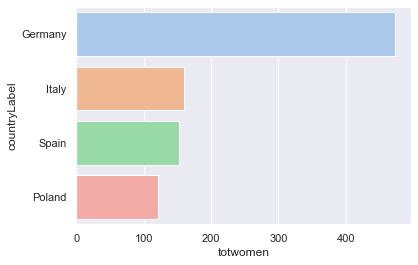

In [165]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

my_graph = sns.barplot(y="countryLabel", x ="totwomen", palette="pastel", data= merged_bc)

As we can see the majority of the are born and have the German citizenship, then the italian, spanish and polish one. 

# Conclusions

- As we can see the majority of the art historians in the world are male, so in proportion for every comparsion that was made the men are always numerical superior to women
- The most common occupations among female art historian are: university teacher(405) historian (404) and exhibition curator while  among men are: university teacher (1785), archaeologist (1091) and then historian (1013)
- The majority of female art hitorians are born and have died in Germany, have a german citizenship, and also have worked in german institute but they have studied in the United States universities.  